# Imports

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Exploration

In [2]:
# import evictions df
edf = pd.read_excel('evictions_prepared.xlsx')

# import requests df
rdf = pd.read_excel('requests_prepared.xlsx')

# cast zip_code column in both df's as string type
rdf['zip_code'] = rdf.zip_code.astype(str)
edf['zip_code'] = edf.zip_code.astype(str)

In [3]:
edf.head(10)

,case_number,judgement_date,zip_code,disposition
0,41E2407310,2024-12-19,78223,Judgment for Plaintiff (OCA)
1,21E2407657,2024-12-19,78229,Default Judgments (OCA)
2,21E2407655,2024-12-19,78229,Default Judgments (OCA)
3,21E2407654,2024-12-19,78229,Default Judgments (OCA)
4,21E2407650,2024-12-19,78251,Default Judgments (OCA)
5,21E2407649,2024-12-19,78229,Default Judgments (OCA)
6,21E2407648,2024-12-19,78229,Default Judgments (OCA)
7,21E2407647,2024-12-19,78229,Judgment for Plaintiff (OCA)
8,21E2407646,2024-12-19,78229,Judgment for Plaintiff (OCA)
9,21E2407645,2024-12-19,78228,Default Judgments (OCA)


In [4]:
rdf.head(10)

,open_date,type,latitude,longitude,zip_code
0,2023-10-20,Homeless Encampment,29.444219,-98.516167,78201
1,2023-11-02,Homeless Encampment,29.351602,-98.534868,78224
2,2023-11-06,Homeless Encampment,29.535004,-98.541934,78230
3,2023-11-28,Homeless Encampment,29.461083,-98.569024,78228
4,2023-12-04,Homeless Encampment,29.528313,-98.556656,78230
5,2023-12-06,Homeless Encampment,29.512414,-98.525528,78213
6,2023-12-16,Homeless Encampment,29.507367,-98.519163,78213
7,2023-12-19,Homeless Encampment,29.621459,-98.464573,78259
8,2023-12-19,Homeless Encampment,29.343525,-98.484157,78214
9,2023-12-20,Homeless Encampment,29.317004,-98.503728,78221


## What is the time overlap between the two data sets?
* Evictions data cover all of 2024
* Requests data seems to cover from late 2023 to early 2025
* an apt comparison should be able to be made using the full eviction data and reqiests made during 2024

In [5]:
# getting comp readout of min and max time for each dataframe
time_stamp()

The eviction dataframe contains data from
2024-01-02 00:00:00
to
2024-12-19 00:00:00

The requests dataframe contains data from
2023-10-20 00:00:00
to
2025-04-12 00:00:00


In [6]:
rdf = rdf[rdf['open_date'].dt.year == 2024]

rdf.shape

(2197, 5)

In [7]:
rdf.head()

,open_date,type,latitude,longitude,zip_code
12,2024-01-03,Homeless Encampment,29.427353,-98.503727,78207
13,2024-01-03,Homeless Encampment,29.448031,-98.707380,78251
14,2024-01-04,Homeless Encampment,29.524882,-98.410335,78217
15,2024-01-04,Homeless Encampment,29.428445,-98.452225,78202
16,2024-01-05,Homeless Encampment,29.476837,-98.588266,78228


## Is there a correlation between the number of eviction cases and homelessness cases in a given zip code during that time?

In [8]:
# getting df to compare eviction and homelessness cases

# empty dict
zip_dict = {'zip_code':[],
            'homelessness_requests':[],
            'eviction_cases':[]}

# list of zips in San Antonio
sa_zips = ['78201', '78202', '78203', '78204', '78205', 
           '78206', '78207', '78208', '78209', '78210', 
           '78211', '78212', '78213', '78214', '78215', 
           '78216', '78217', '78218', '78219', '78220', 
           '78221', '78222', '78223', '78224', '78225', 
           '78226', '78227', '78228', '78229', '78230', 
           '78231', '78232', '78233', '78234', '78235', 
           '78236', '78237', '78238', '78239', '78240', 
           '78241', '78242', '78243', '78244', '78245', 
           '78246', '78247', '78248', '78249', '78250', 
           '78251', '78252', '78253', '78254', '78255', 
           '78256', '78257', '78258', '78259', '78260', 
           '78261', '78262', '78263', '78264', '78265', 
           '78266', '78268', '78269', '78270', '78275', 
           '78278', '78279', '78280', '78283', '78284', 
           '78285', '78286', '78287', '78288', '78289', 
           '78291', '78292', '78293', '78294', '78295', 
           '78296', '78297', '78298', '78299']

# adding information to dict
for item in sa_zips:
    
    zip_code = item
    
    recs = len(rdf[rdf.zip_code == zip_code])
    
    evicts = len(edf[edf.zip_code == zip_code])
    
    li =[zip_code, recs, evicts]
    
    for i, key in enumerate(zip_dict):
        
        zip_dict[key].append(li[i])
    
redf = pd.DataFrame(zip_dict)
    
redf.head()

,zip_code,homelessness_requests,eviction_cases
0,78201,228,388
1,78202,27,177
2,78203,9,31
3,78204,48,72
4,78205,22,20


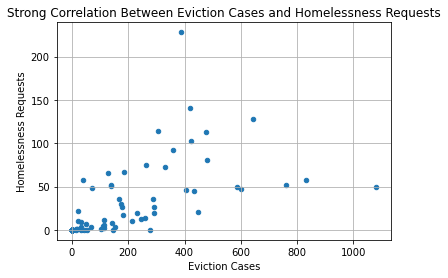

In [28]:
# Create a basic scatter plot
redf.plot.scatter(x='eviction_cases', y='homelessness_requests')
plt.title('Strong Correlation Between Eviction Cases and Homelessness Requests')
plt.xlabel('Eviction Cases')
plt.ylabel('Homelessness Requests')
plt.grid(True)
plt.show()

In [26]:
correlation_coeff, p_value = pearsonr(redf['eviction_cases'], redf['homelessness_requests'])
print(correlation_coeff, p_value)

0.6240280503952236 6.433703413332502e-11
